# Ex03 고양이 수염 스티커 만들기

In [1]:
#필요한 패키지 import
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 준비한 image 읽기

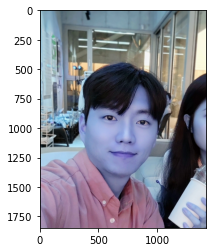

In [2]:
my_image_path = './images/my_image.png' 
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

## 이미지 RGB로 변환하기

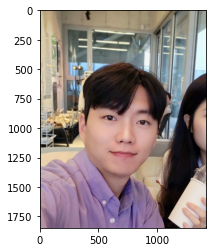

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## HOG detector 선언

In [4]:
detector_hog = dlib.get_frontal_face_detector()

## Bounding box 추출

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

## 찾은 얼굴 출력

rectangles[[(418, 788) (972, 1343)]]


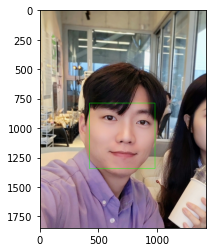

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 학습된 모델 가져오기 (shape_predictor_68_face_landmarks.dat)

In [7]:
model_path = './models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

## 랜드마크 위치 생성 및 좌표 저장

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

68


## 랜드마크 출력

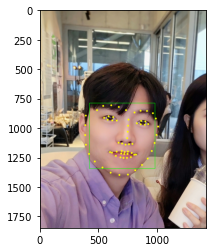

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 8, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()

## 코가 있는 부분의 범위를 찾기

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(737, 1085)
(x,y) : (737,1363)
(w,h) : (555,555)


## 스티커 이미지 불러오기

In [11]:
sticker_path = './images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape)

(555, 555, 3)


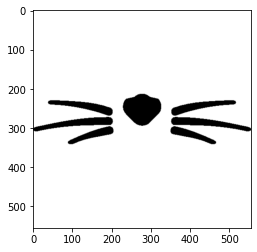

In [12]:
plt.imshow(img_sticker)

In [13]:
refined_x = x - w // 2 
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (460,808)


In [14]:
'''
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
'''

'\nsticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]\n\nimg_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] =     np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)\n'

## 노드에 나와있던 위의 코드를 그대로 실행할 시 투명한 부분과 색칠된 부분이 반전되어 보임
### 따라서 아래의 GPT가 알려준 코드로 변환함

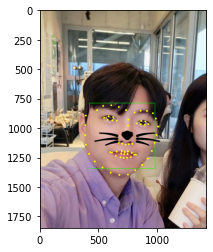

In [15]:
img_show_copy = img_show.copy()

sticker_area = img_show_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 스티커 이미지에서 특정 색상(흰색)을 투명으로 처리하는 마스크 생성
sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)

# 흰색 부분을 찾아 마스크 생성 (240 이상을 흰색으로 간주)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색을 투명으로 처리

# 마스크의 반전 (투명 부분과 불투명 부분)
mask_inv = cv2.bitwise_not(mask)

# 스티커가 적용될 영역에서 배경을 유지
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)

# 스티커 이미지에서 덧씌울 부분만 남기고 나머지 제거
sticker_fg = cv2.bitwise_and(img_sticker, img_sticker, mask=mask)

# 배경과 스티커를 합성
dst = cv2.add(sticker_area_bg, sticker_fg)

# 결과를 원본 이미지에 적용
img_show_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = dst

plt.imshow(cv2.cvtColor(img_show_copy, cv2.COLOR_BGR2RGB))
plt.show()

# *문제점 찾아보기 1 얼굴 각도에 따라 스티거 변환*

## 아래의 코드는 gpt와 함께 스티커의 이미지를 시계방향으로 10도 돌려서 부착하는 방식을 사용해본 것이다. 하지만, 이게 좀 깨져서 나와서 아직 어떻게 해야할지는 모르겠다.

* 얼굴 각도에 따라 스티커를 돌려줘야하는데 아직 어떻게 해야할지 감이 잡히지 않는다

In [16]:
'''
# 스티커 이미지의 크기
sticker_height, sticker_width = img_sticker.shape[:2]

# 회전 중심 (이미지의 중심)
center = (sticker_width // 2, sticker_height // 2)

# 10도 시계 방향 회전 행렬 생성
rotation_matrix = cv2.getRotationMatrix2D(center, -10, 1.0)  # 두 번째 인자가 각도, 세 번째 인자가 스케일

# 회전된 이미지의 경계 박스 크기 계산
cos_val = np.abs(rotation_matrix[0, 0])
sin_val = np.abs(rotation_matrix[0, 1])

# 새로운 이미지 크기 계산 (회전 후에도 이미지가 잘리지 않도록)
new_width = int((sticker_height * sin_val) + (sticker_width * cos_val))
new_height = int((sticker_height * cos_val) + (sticker_width * sin_val))

# 회전 행렬을 새로운 이미지 크기에 맞게 이동
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# 새로운 크기로 회전된 스티커 이미지 생성 (캔버스를 넓힘)
rotated_sticker = cv2.warpAffine(img_sticker, rotation_matrix, (new_width, new_height), borderMode=cv2.BORDER_TRANSPARENT)

# 이제 회전된 스티커 이미지를 사용하여 앞서의 마스크 처리 적용
sticker_area = img_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]

# 투명 부분 마스크 생성
sticker_gray = cv2.cvtColor(rotated_sticker, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# 배경과 스티커 합성
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)
sticker_fg = cv2.bitwise_and(rotated_sticker, rotated_sticker, mask=mask)

dst = cv2.add(sticker_area_bg, sticker_fg)

# 최종 이미지를 원본에 적용
img_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = dst
'''

'\n# 스티커 이미지의 크기\nsticker_height, sticker_width = img_sticker.shape[:2]\n\n# 회전 중심 (이미지의 중심)\ncenter = (sticker_width // 2, sticker_height // 2)\n\n# 10도 시계 방향 회전 행렬 생성\nrotation_matrix = cv2.getRotationMatrix2D(center, -10, 1.0)  # 두 번째 인자가 각도, 세 번째 인자가 스케일\n\n# 회전된 이미지의 경계 박스 크기 계산\ncos_val = np.abs(rotation_matrix[0, 0])\nsin_val = np.abs(rotation_matrix[0, 1])\n\n# 새로운 이미지 크기 계산 (회전 후에도 이미지가 잘리지 않도록)\nnew_width = int((sticker_height * sin_val) + (sticker_width * cos_val))\nnew_height = int((sticker_height * cos_val) + (sticker_width * sin_val))\n\n# 회전 행렬을 새로운 이미지 크기에 맞게 이동\nrotation_matrix[0, 2] += (new_width / 2) - center[0]\nrotation_matrix[1, 2] += (new_height / 2) - center[1]\n\n# 새로운 크기로 회전된 스티커 이미지 생성 (캔버스를 넓힘)\nrotated_sticker = cv2.warpAffine(img_sticker, rotation_matrix, (new_width, new_height), borderMode=cv2.BORDER_TRANSPARENT)\n\n# 이제 회전된 스티커 이미지를 사용하여 앞서의 마스크 처리 적용\nsticker_area = img_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_stick

## Bounding box와 landmark 제거하고 최종결과 출력하기 (흰색으로 바꿈)

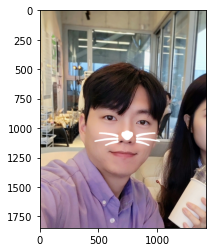

In [17]:
# 원본 이미지 복사본 생성
img_bgr_copy = img_bgr.copy()

# 스티커가 적용될 영역 설정
sticker_area = img_bgr_copy[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# 스티커 이미지에서 특정 색상(흰색)을 투명으로 처리하는 마스크 생성
sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색을 투명으로 처리
mask_inv = cv2.bitwise_not(mask)

# 흰색 스티커 이미지 생성
white_sticker = np.ones_like(img_sticker) * 255  # 흰색으로 채우기

# 흰색 스티커와 원본 스티커를 마스크를 사용하여 결합
sticker_fg = cv2.bitwise_and(white_sticker, white_sticker, mask=mask)

# 스티커가 적용될 영역에서 배경을 유지
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)

# 배경과 흰색 스티커를 합성
dst = cv2.add(sticker_area_bg, sticker_fg)

# 결과를 복사본 이미지에 적용
img_bgr_copy[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = dst

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환하여 출력
plt.show()

# 최종 이미지!

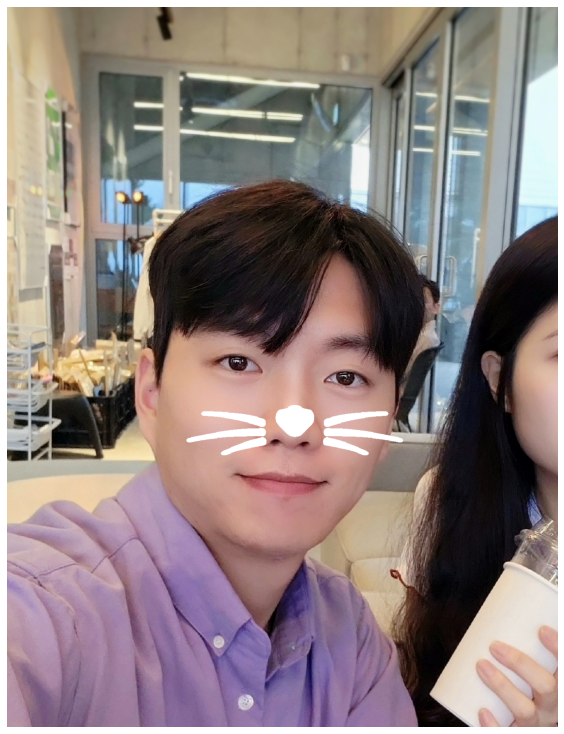

In [18]:
plt.figure(figsize=(10, 10))  # 이미지 크기 조정
plt.imshow(cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환하여 출력
plt.axis('off')  # 축 제거
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 여백 조정
plt.show()

# 실험실

<function matplotlib.pyplot.show(close=None, block=None)>

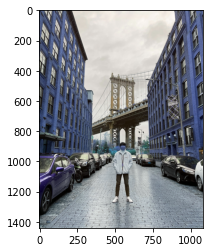

In [19]:
far_image_path = './images/Far.png'
fimg_bgr = cv2.imread(far_image_path)
fimg_show = fimg_bgr.copy()
plt.imshow(fimg_bgr)
plt.show

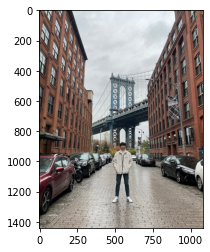

In [20]:
fimg_rgb = cv2.cvtColor(fimg_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(fimg_rgb)
plt.show()

In [21]:
fimg_rgb = cv2.cvtColor(fimg_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(fimg_rgb, 1) 

rectangles[[(533, 886) (569, 922)]]


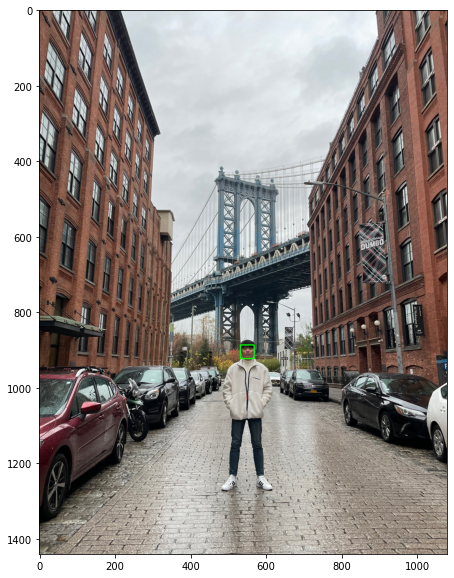

In [22]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(fimg_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

fimg_show_rgb =  cv2.cvtColor(fimg_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10)) 
plt.imshow(fimg_show_rgb)
plt.show()

In [23]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(fimg_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


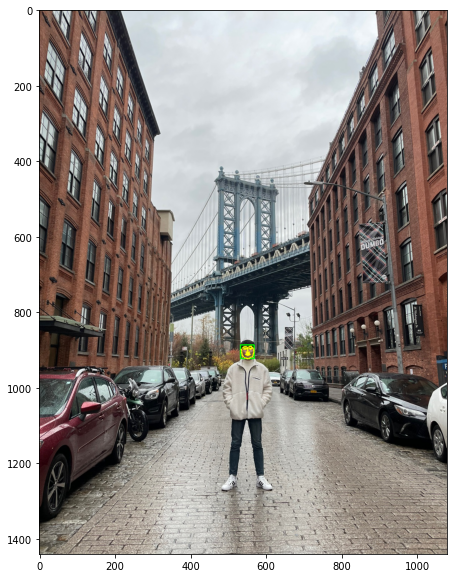

In [24]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(fimg_show, point, 2, (0, 255, 255), -1)
        
fimg_show_rgb = cv2.cvtColor(fimg_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10)) 
plt.imshow(fimg_show_rgb)
plt.show()

In [25]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(552, 902)
(x,y) : (552,920)
(w,h) : (37,37)


In [26]:
fimg_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
fimg_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(555, 555, 3)


In [27]:
refined_x = x - w // 2
refined_y = y - h 

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (534,883)


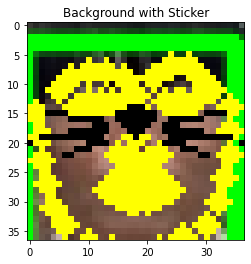

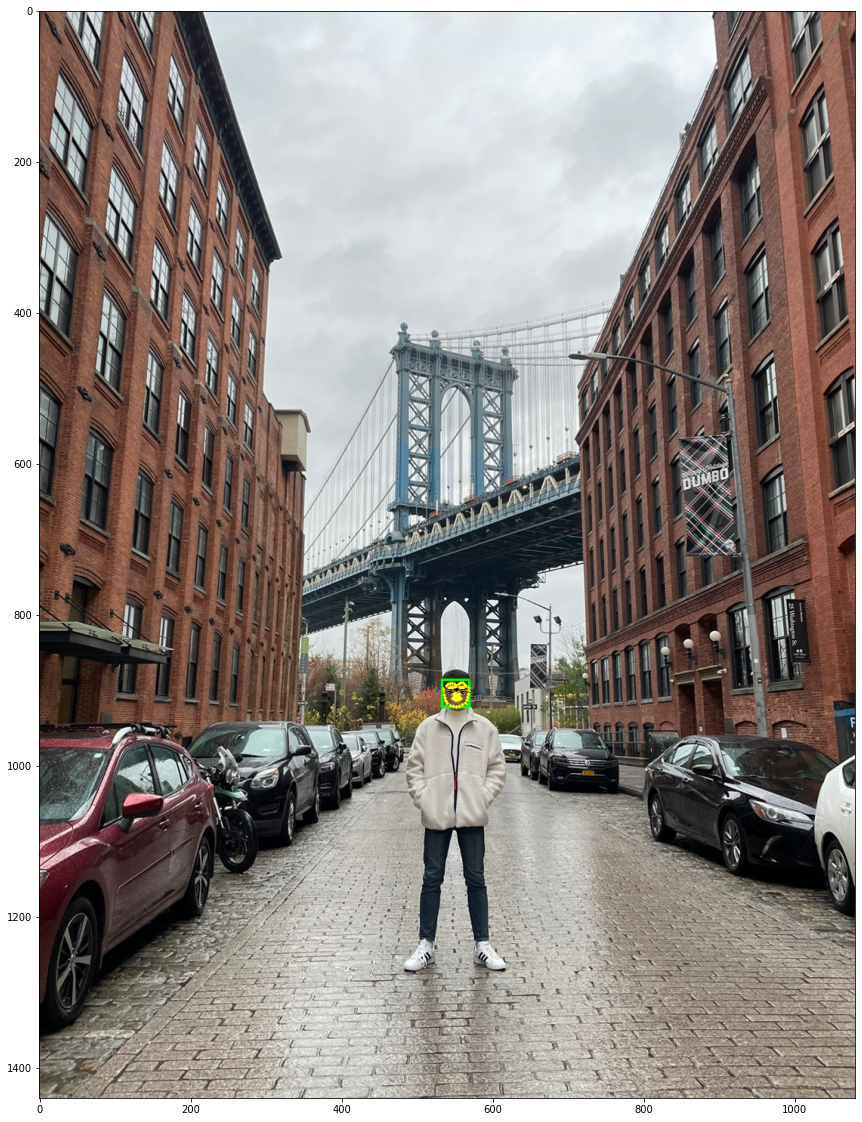

In [30]:
fimg_show_copy = fimg_show.copy()

sticker_area = fimg_show_copy[refined_y:refined_y+fimg_sticker.shape[0], refined_x:refined_x+fimg_sticker.shape[1]]

# 스티커 이미지에서 특정 색상(흰색)을 투명으로 처리하는 마스크 생성
sticker_gray = cv2.cvtColor(fimg_sticker, cv2.COLOR_BGR2GRAY)

# 흰색 부분을 찾아 마스크 생성 (240 이상을 흰색으로 간주)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색을 투명으로 처리

# 마스크의 반전 (투명 부분과 불투명 부분)
mask_inv = cv2.bitwise_not(mask)

# 스티커가 적용될 영역에서 배경을 유지
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)

plt.imshow(cv2.cvtColor(sticker_area_bg, cv2.COLOR_BGR2RGB))
plt.title("Background with Sticker")
plt.show()

# 스티커 이미지에서 덧씌울 부분만 남기고 나머지 제거
sticker_fg = cv2.bitwise_and(fimg_sticker, fimg_sticker, mask=mask)

# 배경과 스티커를 합성
dst = cv2.add(sticker_area_bg, sticker_fg)

# 결과를 원본 이미지에 적용
fimg_show_copy[refined_y:refined_y+fimg_sticker.shape[0], refined_x:refined_x+fimg_sticker.shape[1]] = dst

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(fimg_show_copy, cv2.COLOR_BGR2RGB))
plt.show()

## 멀리있으면 안될 줄 알았는데... 일단 된다... 더 멀리 있는 것이면 안 될 수 있을지도 모른다

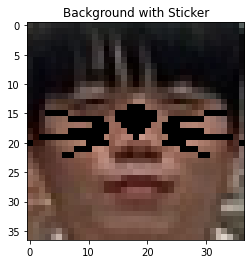

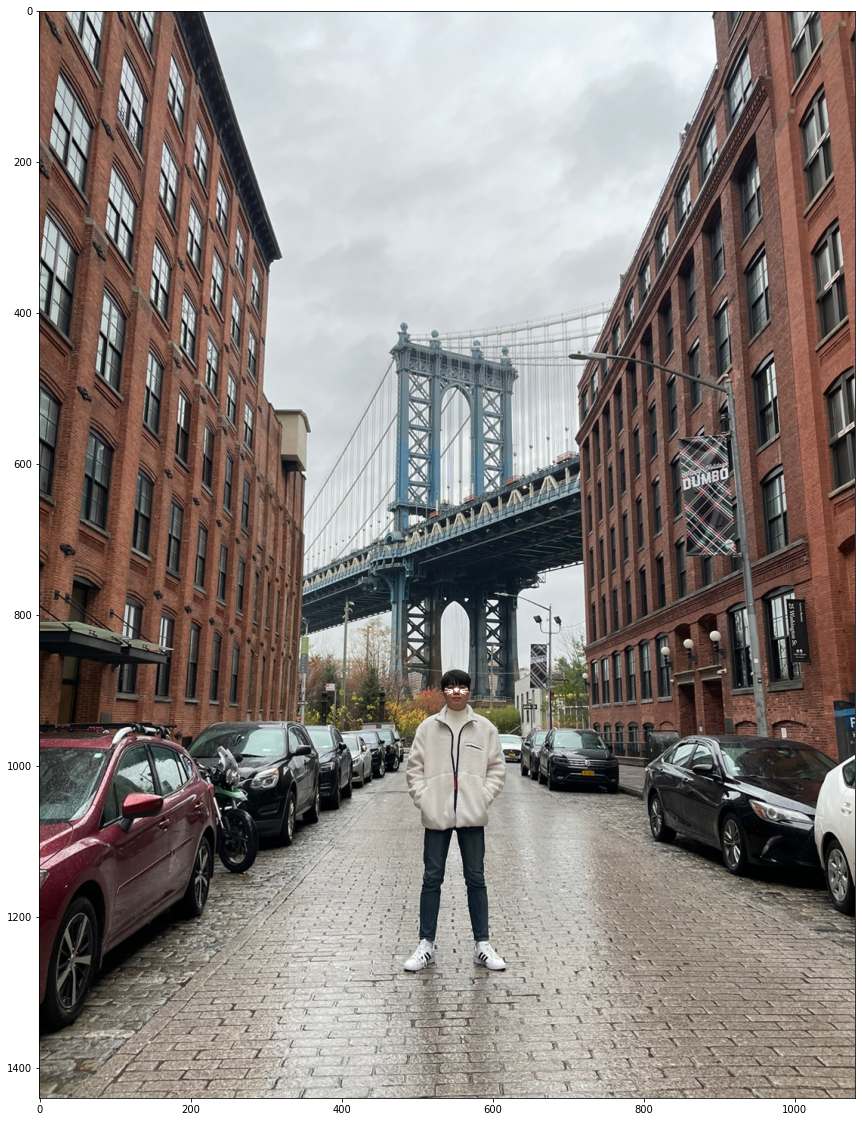

In [32]:
# 원본 이미지 복사본 생성
fimg_bgr_copy = fimg_bgr.copy()

# 스티커가 적용될 영역 설정
sticker_area = fimg_bgr_copy[refined_y:refined_y + fimg_sticker.shape[0], refined_x:refined_x + fimg_sticker.shape[1]]

# 스티커 이미지에서 특정 색상(흰색)을 투명으로 처리하는 마스크 생성
sticker_gray = cv2.cvtColor(fimg_sticker, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(sticker_gray, 240, 255, cv2.THRESH_BINARY_INV)  # 흰색을 투명으로 처리
mask_inv = cv2.bitwise_not(mask)

# 흰색 스티커 이미지 생성
white_sticker = np.ones_like(fimg_sticker) * 255  # 흰색으로 채우기

# 흰색 스티커와 원본 스티커를 마스크를 사용하여 결합
sticker_fg = cv2.bitwise_and(white_sticker, white_sticker, mask=mask)

# 스티커가 적용될 영역에서 배경을 유지
sticker_area_bg = cv2.bitwise_and(sticker_area, sticker_area, mask=mask_inv)

plt.imshow(cv2.cvtColor(sticker_area_bg, cv2.COLOR_BGR2RGB))
plt.title("Background with Sticker")
plt.show()

# 배경과 흰색 스티커를 합성
dst2 = cv2.add(sticker_area_bg, sticker_fg)

# 결과를 복사본 이미지에 적용
fimg_bgr_copy[refined_y:refined_y + fimg_sticker.shape[0], refined_x:refined_x + fimg_sticker.shape[1]] = dst2

# 결과 이미지 출력
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(fimg_bgr_copy, cv2.COLOR_BGR2RGB))  # BGR을 RGB로 변환하여 출력
plt.show()

# 확실히 코의 위치를 잘 못잡기는 하는 것 같다. 이런 것을 해결하기 위해서는 확대해서 보면서 세부적인 조정이 필수적일 것 같다.

# 회고

* 기존에 노드에 나와있던 코드로 진행했음
* 일단 스티커를 불러올 때 투명해야할 곳이 흰색으로 칠해져있고, 검은색으로 보여야할 곳이 투명했음.
* GPT의 도움을 받아 색상 반전을 통해 해결한 것 같음
* 색깔이 흰색이 사진에 더 어울릴거같아서 흰색으로 바꿔달라고 GPT에게 요청해서 그 코드를 사용함


* 멀리 있는 사진을 활용해서 실험을 해봤는데, 일단 랜드마크가 찍힌 것은 놀라우나, 얼굴이 너무 작게 인식되어 정확도가 떨어진다.
* 피사체가 어느정도는 가까워야 윤곽과 이목구비가 구분될 수 있을 것 같다.

* 실행속도 관련해서는, 빠르면 빠를 수록 좋을 것 같다. 하지만, 빠르다는 것은 모델이 가볍다고 생각될 수 있고, 그렇다면 정확도가 매우 낮아질 수 있을지도 모른다.

* 정확도에 대해서는 크게 중요하지는 않다고 생각된다. 만약에 붙이고자 하는 스티커 이미지가 크다면 어느 정도의 오차는 용인될 것 같다.

* 하지만, 만약에 매우 작은 스티커를 부착한다면, 정확도를 올리기 위해 새로운 방안을 도입해야할지도 모른다.